# Simulation 02

#### 2018-10-03                                     Josep Fortiana 

## Non uniform random numbers 01: Inverse transformation

The most frequent methods used to generate random numbers following non-uniform distributions, including those we saw in last session, hardwired inside the pre-programmed `r*` `R` functions for well-known distributions, are:

1.  The inverse transformation method (for univariate distributions)

2.  For discrete distributions, random sampling following a given pmf (which may be considered a particular instance
    of the above)

3.  The acceptance-rejection method.

4.  Other transformation-based methods, specific for certain distributions.

In this session we will be working with the first two. Next session will be devoted to the rejection sampling method of generating random numbers, which is important both in itself and as a hint to the all-important MCMC methods, which feature a rejection scheme as a crucial step.

Based on the following property: assume $F:\mathbf{R}\to[0,1]$ is a univariate cdf, that is, a function such that,

-   $F: \mathbf{R}\to[0,1]$ is a non-decreasing, right-continuous function,

-   $F(-\infty)=0$, $F(+\infty)=1$.

Consider the *quantile, or (left-continuous) pseudoinverse* $F^{-}:[0,1]\to \mathbf{R}$ of $F$ (when $F$ is an is an injective function, $F^{-}=F^{-1}$, the ordinary inverse function).

Given a $U\sim\mbox{Unif}[0,1]$, we define the new : 
$$
    X\equiv F^{-}\circ U=F^{-}(U).
$$


It can be proved that $X$ is a r.v.  whose cdf is $F$. This fact is very intuitive when $F$ is a continuous injective function, with inverse function $F^{-1}$. Given any real number $x\in\mathbf{R}$, the value at $x$ of the probability distribution function of $X$ is, by definition:

$$
    P[X\leq x]=P[F^{-1}(U)\leq x]=P[U\leq F(x)]=F(x).
$$

The last equality is due to the fact that the cdf of a $\mbox{Unif}[0,1]$ coincides with the identity function on the interval $(0,1)$. For a proof in the general case, see the Appendix to Chapter 3 in [Fortiana, J.; Nualart, D. (1999) Estadística (catalan)](http://cataleg.ub.edu/record=b1396567~S1*cat).

If $\mathbf{u}$ is a RSN (Random Sequence of Numbers), distributed as a $\mbox{Unif}[0,1]$, then the sequence $\mathbf{x}$ defined as: 
$$
    x_{t}=F^{-}(u_{t}),\quad t\geq 1,
$$
is a RSN with distribution $F$.

This method has two important limitations:

1.  Valid only for one-dimensional ,

2.  Requires that $F^{-}$ can be computed.


### Exercise

Design and write the code for a generator of random numbers for the $\mbox{Exp}(\lambda)$ distribution based on the inverse cdf transformation method.

### Solution

1. Compute the quantile function $Q(y)=F^{-1}(y)$:
$$
		{\renewcommand{\arraystretch}{1.2}\begin{array}{lcl}
		F(x)		&=	&1-\exp(-\lambda\,x)=y,\\
		1-y			&=	&\exp(-\lambda\,x),\\
		\log(1-y)	&=	&-\lambda\,x,\\
		x			&=	&-\dfrac{1}{\lambda}\,\log(1-y).
		\end{array}}%
$$

2. Code for a function to compute random numbers following the $\mbox{Exp}(\lambda)$ distribution.
```
my.rexp<-function(n,rate=1){
            return(-log(1-runif(n))/rate)
            }
```

3. Compare to the `rexp` function from the R `stats` package.

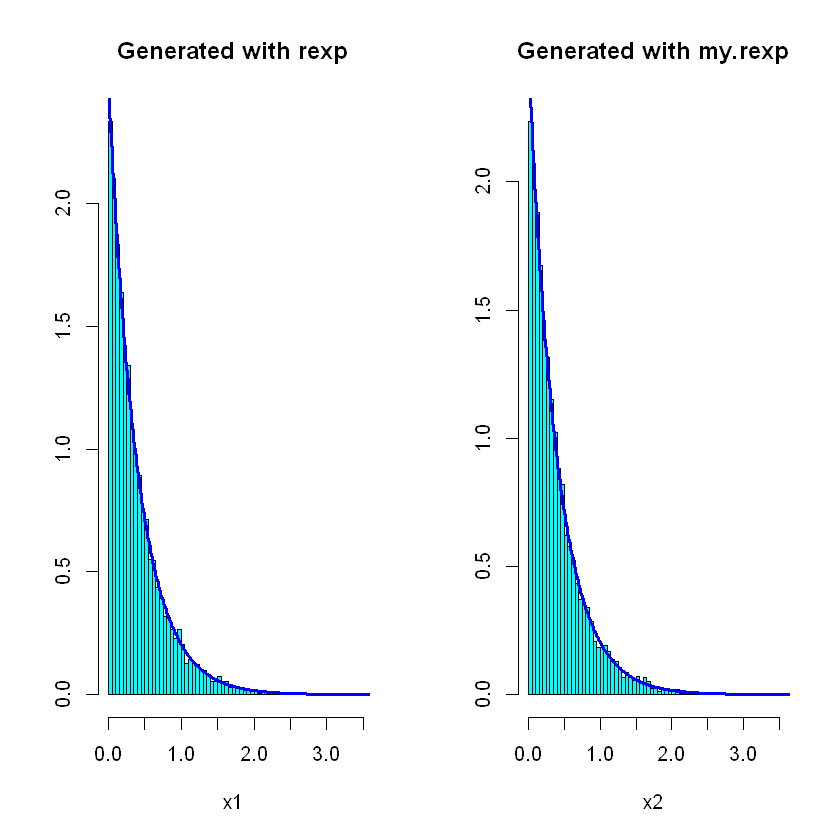

In [14]:
require(MASS)
my.rexp<-function(n,rate=1){
         return(-log(1-runif(n))/rate)
         }
n<-10000
lambda<-2.5
x1<-rexp(n,rate=lambda)
x2<-my.rexp(n,rate=lambda)
old.par<-par(mfrow=c(1,2))
u<-seq(0,2*lambda,length=500)
truehist(x1,main="Generated with rexp")
lines(u,dexp(u,rate=lambda),lwd=2.5,col="blue")
truehist(x2,main="Generated with my.rexp")
lines(u,dexp(u,rate=lambda),lwd=2.5,col="blue")
par(old.par)


In [ ]:
hist(x2,col, )


# ?hist

### Exercise

Design, write the code for and test (by comparing its output with that of the pre-programmed R function) a generator of random numbers for the $\mbox{Cauchy}(x_{0},\gamma)$ distribution  based on the inverse cdf transformation method. 

In [2]:
#
# (Insert here your code)
#

### Exercise

Design, write the code for and test (by comparing its output with that of the pre-programmed R function) a generator of random numbers for the $\mbox{Logistic}(\mu,s)$ distribution based on the inverse cdf transformation method. 

In [3]:
#
#(Insert here your code)
#

## Non uniform random numbers 02: Discrete distributions

A vector $\mathbf{z}$ of $n$ random numbers following a given discrete distribution, with vector of values $\mathbf{x}=(x_{1},\dots,x_{m})$ and vector of probabilities $\mathbf{d}=(d_{1},\dots,d_{m})$, can be generated from a vector $\mathbf{u}$ of $n$ $\mbox{Unif}(0,1)$-distributed random numbers by relying on the fact that a $\mbox{Unif}(0,1)$ distribution is characterized by the property that the probability of any subsegment of $[0,1]$ is equal to its length.

Thus, if we subdivide the $[0,1]$ segment into $m$ pieces of lengths $(d_{1},\dots,d_{m})$, respectively, each $(0,1)$-uniform random number $u_{i}$ will fall onto a $j$-th piece of length $d_{j}$ with probability equal to $d_{j}$. Then we assign:

$$
    z_{i}=x_{j},\quad\text{  if }\quad u_{i}\quad\text{ falls onto the segment of length }d_{j}.
$$

The following code is an (admittedly suboptimal) implementation of this principle:

In [19]:
r.disc.rv.1<-function(n,x,d){
    k<-length(d)
    p<-c(0,cumsum(d))
    
    p0<-p[-(k+1)]
    p1<-p[-1] #
    print(p0) #
    print(p1) #
    z<-rep(0,n)
    for (i in 1:n){
        u<-runif(1)
        Ind<-(p0<=u)&(u<p1)
        z[i]=sum(x*Ind)
        }
    return(z)
    } #
r.disc.rv.1(10, c(23,55,4,21,77,6,9,88,14,25), c(0.1,0.005,0.005,0.095,0.08,0.015,0.4,0.2,0.05,0.05))

 [1] 0.000 0.100 0.105 0.110 0.205 0.285 0.300 0.700 0.900 0.950
 [1] 0.100 0.105 0.110 0.205 0.285 0.300 0.700 0.900 0.950 1.000


[1] 25 23  9 23  9 23 77  9  9 77

A much more efficient code,	using the `sample` function in R (see its help page), is as follows:

In [5]:
r.disc.rv<-function(n,x,d){
    z<-sample(x,size=n,replace=TRUE,prob=d)
    return(z)
    }

You can check that the first method as implemented in `r.disc.rv.1` is, in fact, just a literal implementation of the inverse cdf transformation method, where the pseudoinverse $Q=F^{-}$ of the non-injective, discrete step function cdf $F$ is used.		

### Exercise

In the Wikipedia article [Letter frequency](https://en.wikipedia.org/wiki/Letter_frequency) you can find a table with the proportion of appearance of each letters in the English language. Using `r.disc.rv` compute a sequence of `n=10000` random letters following this distribution.

In [3]:
#
#(Insert here your code)
#

## Simulation in Bayesian Statistics

Work in computational Bayesian Statistics consists most often of extracting information about a probability distribution from a sample of numbers following such distribution, generated with a more or less involved simulation procedure. The unknown distribution target will not be a _named_ well-known distribution. 

Now we begin to learn how to do this with the tools we have seen so far.

The following code can be used to simulate the random experiment of repeatedly tossing a regular coin, stopping when it falls heads. Yes, we know that the counting r.v. $Y\sim\mbox{geomdist}(1/2)$, so calling `rgeom` would be easier and more efficient, but lets forget that for a while. 

The function returns a length `n` vector `y` containing an $n$-sample of the r.v. $Y=$ “number of tosses needed to obtain a heads result". $N$ is a reasonable upper bound to $Y$, just to avoid a potentially too long run.

In [53]:
sim.rep.coin.y<-function(n,prob=0.5,N=500){
    y<-rep(0,n)
    for (i in 1:n){
        k<-0
        while (k<N){
            k<-k+1
            if (rbinom(1,size=1,prob=prob)==1) break
            }
        y[i]<-k
        }
    return(y)
    }

### Exercise

There are two possible definitions for a geometric r.v., the one above and $X=$ “number of tails before the first heads result". Obviously $X=Y-1$ and while $Y$  takes values $1,2,3,\dots$, $X$ takes values $0,1,2,\dots$. The `R` implementation of the geometric distribution uses the $X$ definition. Modify the code above to be able to compare output to that of `rgeom`.

In [7]:
sim.rep.coin.x<-function(n,prob=0.5,N=500){
    #
    #(Insert here your code)
    #
    }

### Exercise

From a sequence `x` of random numbers generated with `sim.rep.coin.x` we can estimate many things: the pmf of the $X$ by tabulating `x`, the expectation $\mbox{E}(X)$ (How?), etc., and answer questions such as: What is the probability of $[X>4]$? Which is the most probable value of $X$?, What is the probability of some given value?

In [8]:
# Insert here your code for estimating 
# (1) the pmf of X, 
# (2) its expectation and variance, 
# (3) the probability of [X>a] for a given a, 
# (4) a value x0 of X such that P[X>x0]>=0.9,
# (5) the most probable value of X.

### Exercise

We have an urn with $a$ white balls and $b$ black balls, where $a,b$ are positive integers. A ball is randomly selected from the urn, and is returned to the urn along with an additional number, $c\in\mathbf{Z}$ (positive or negative), of balls of its same color, from sufficiently large repositories with balls of both colors. The process is repeated $m\in\mathbf{N}$ times. Let $X=$ total number of white balls in the $m$ extractions. This scheme generalizes the standard models of sampling with and without replacement. For $c=-1$ we recover the *sampling without replacement scheme (hypergeometric sampling),* and for $c=0$ we recover the *sampling with replacement scheme (binomial sampling).* The general case is called *Polya’s Urn scheme.*See [Pólya's Urn Process](http://www.randomservices.org/random/urn/Polya.html) for context information.

1. Write code to simulate Pólya's urn experiment.

2. Then write a random number generator to obtain a sample of $n$ independent $X$ values (for some given a,b,c). 

3. Describe the pmf and moments of the resulting $X$ as in the exercise above.

In [ ]:
# try all the exercises except for this one! thig might be 
#
#(Insert here your code)
#